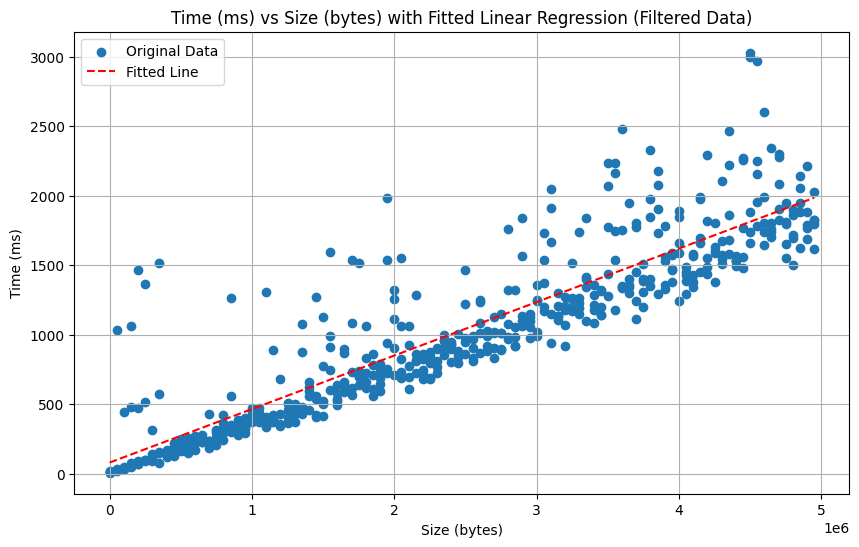

Intercept (base latency): 79.31556435643563
Slope: 0.00038486013561356134
R^2: 0.7918848925284818
Equation: Time = 79.31556435643563 + 0.00038486013561356134 * Size


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('results/qCW4k.csv')



# Prepare the data for linear regression (flipping axes: Size as X and Time as Y)
X = df['Size (bytes)'].values.reshape(-1, 1)
y = df['Time (ms)'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate predictions and R^2
y_pred = model.predict(X)
r_squared = model.score(X, y)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(df['Size (bytes)'], df['Time (ms)'], label='Original Data', marker='o')
plt.plot(df['Size (bytes)'], y_pred, color='red', linestyle='--', label='Fitted Line')
plt.title('Time (ms) vs Size (bytes) with Fitted Linear Regression (Filtered Data)')
plt.xlabel('Size (bytes)')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f'Intercept (base latency): {model.intercept_}')
print(f'Slope: {model.coef_[0]}')
print(f'R^2: {r_squared}')


In [11]:
# calculate mb/s from slope
slope = model.coef_[0]

# slope is ms/byte -> mb / s

mb_per_s = 1 / (slope * 1e-3 * 1e6)
print(f'MB/s: {mb_per_s}')

MB/s: 2.59834653543879
